In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#first we have to import all relevant python packages 
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
import warnings
warnings.simplefilter(action='ignore')
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read CSV train data file into DataFrame
Store = pd.read_csv('/content/drive/MyDrive/MiniProject /1. Regression/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')

# preview the data
Store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# shape of the dataset
print('The number of samples in data is {}.'.format(Store.shape[0]))

The number of samples in data is 14204.


## 1. Data Exploration and Visualization - Understanding the data

In [ ]:
# explore the existing data types
Store.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#explore the numeric data types
Store.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# check missing values in data
print(Store.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


In [ ]:
Store = Store.replace(to_replace = "@!#$%^&*()<>?/|}{~:?", value = np.nan)

In [ ]:
Store['Item_Outlet_Sales'].fillna(int(Store['Item_Outlet_Sales'].mean()), inplace=True)

In [ ]:
print(Store.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


#### Distribution of numerical features

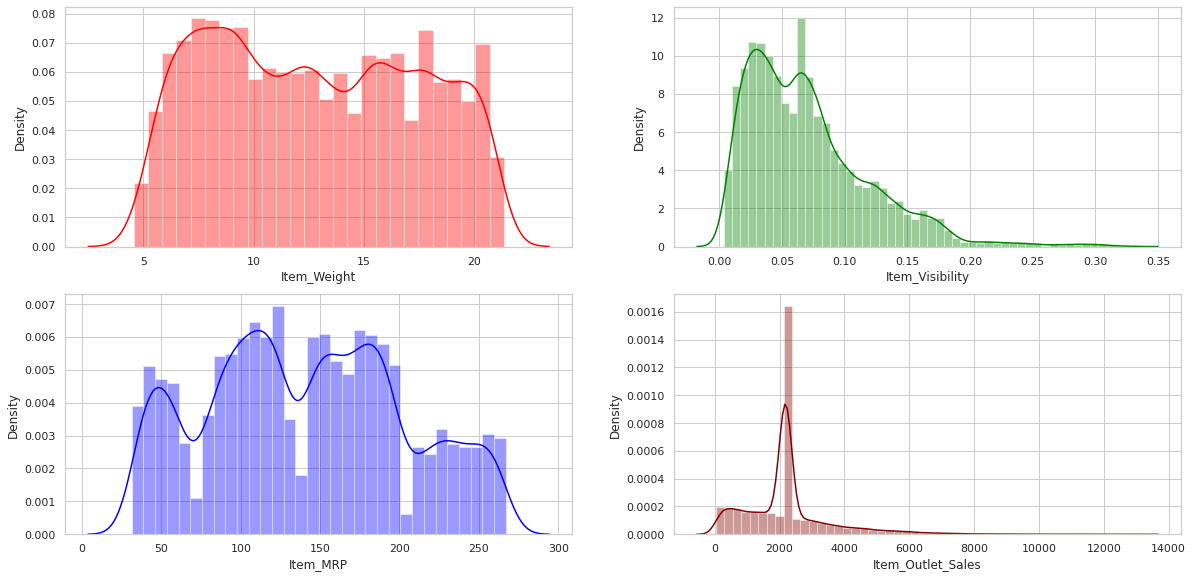

In [ ]:
plt.figure(figsize=(20,15))
# dist of item weight
plt.subplot(3,2,1)
sns.distplot(Store['Item_Weight'], color='red')
# dist of item visibility
plt.subplot(3,2,2)
sns.distplot(Store['Item_Visibility'], color='green')
# dist of item MRP
plt.subplot(3,2,3)
sns.distplot(Store['Item_MRP'], color='blue')
# dist of item outlet sales
plt.subplot(3,2,4)
sns.distplot(Store['Item_Outlet_Sales'], color='maroon')

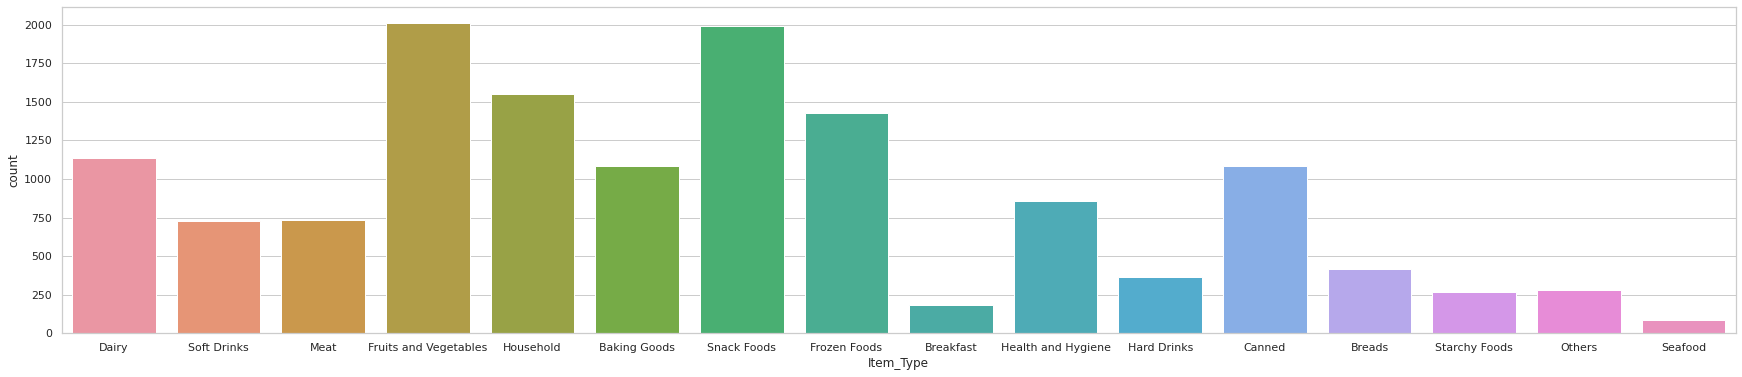

In [ ]:
# Item type
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=Store)
plt.show()

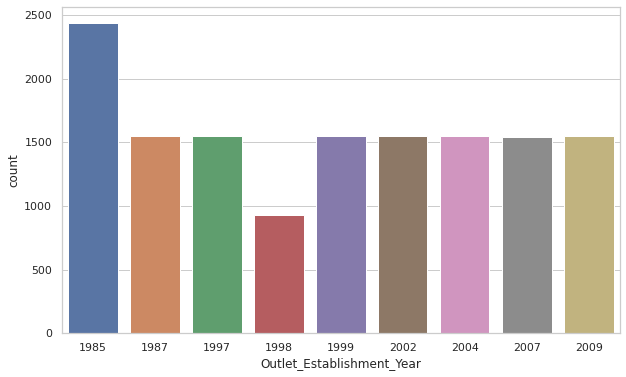

In [ ]:
# Year wise store established 
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year', data=Store)
plt.show()

In [ ]:
list = ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]                         
for i in list :
  Store[i] = Store[i].astype("category")           ## to convert the non numerical column to categorical column
  print(Store)
print(Store.dtypes)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.074402   
4               NCD19         8.93          Low Fat         0.064299   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.064709   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1              

#### Converting Categorical Data to Numerical

In [ ]:
#encoding the categorical data into numerical data
label_encoder = preprocessing.LabelEncoder()

lst_1 = ["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for i in lst_1:
  Store[i] = label_encoder.fit_transform(Store[i])
Store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
print(Store.dtypes)

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object


####Corelation

#### Feature Scaling

In [ ]:
def feature_scale(scale):                                                       # Defining method to perform data scaling operation based on the type of scaling
  numerics = ['int64', 'int32', 'int64', 'float16', 'float32', 'float64']
  Store_scaled = Store.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  Store_scaled = pd.DataFrame(scaler.fit_transform(Store.to_numpy()),columns=Store.columns)
  return Store_scaled

#### Scaling the data using MinMax Scaling process

In [ ]:
scale = 'minmax'        #standard                     # scaling the data using MinMax Scaling process
Store_scaled=feature_scale(scale)
Store_scaled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.164529
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.164529
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.164529
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.164529


In [ ]:
corr = Store_scaled.corr()
corr.style.background_gradient(cmap='cividis')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002220
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010262
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105063
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224


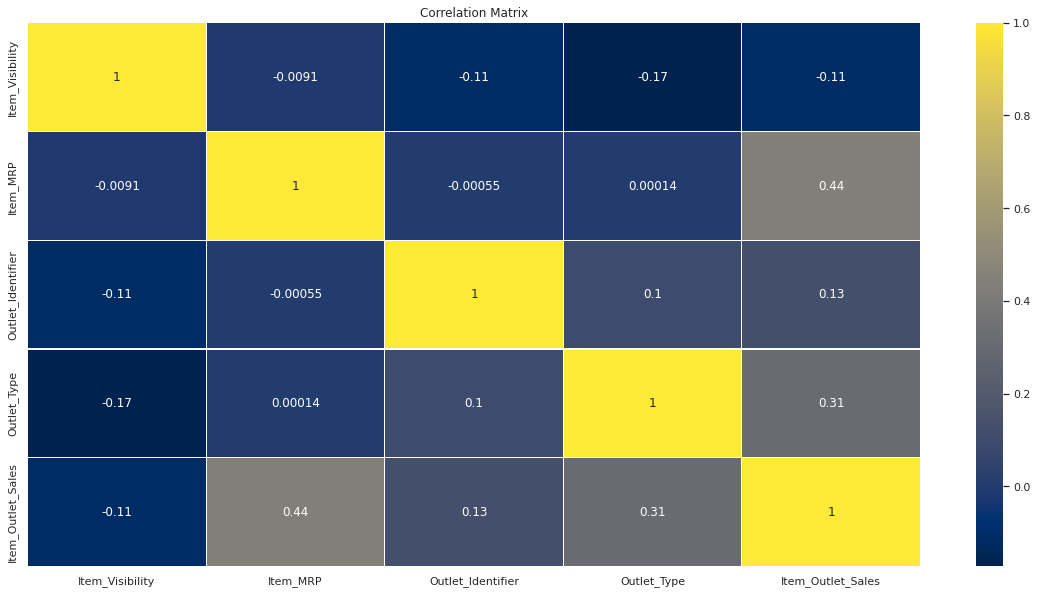

In [ ]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.1
sel_corr = []
for i in Store:
  if abs(Store_scaled[i].corr(Store_scaled['Item_Outlet_Sales']))>=0.1:
    sel_corr.append(i) 

#PLOTTING HEATMAP AMONG SELECTED FEATURES

fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(Store_scaled[sel_corr]
                  .corr(), annot =True, cmap ='cividis',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()

In [ ]:
corr_store_df=Store_scaled[sel_corr]
corr_store_df

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,0.038399,0.927507,1.000000,0.333333,0.283587
1,0.048346,0.072068,0.333333,0.666667,0.031419
2,0.040593,0.468288,1.000000,0.333333,0.158115
3,0.218055,0.640093,0.000000,0.000000,0.053555
4,0.186950,0.095805,0.111111,0.333333,0.073651
...,...,...,...,...,...
14199,0.030546,0.467004,0.888889,0.333333,0.164529
14200,0.429216,0.585126,0.333333,0.666667,0.164529
14201,0.215364,0.371199,0.777778,0.333333,0.164529
14202,0.188211,0.778154,0.222222,0.333333,0.164529


#### Box Plot for Outliers


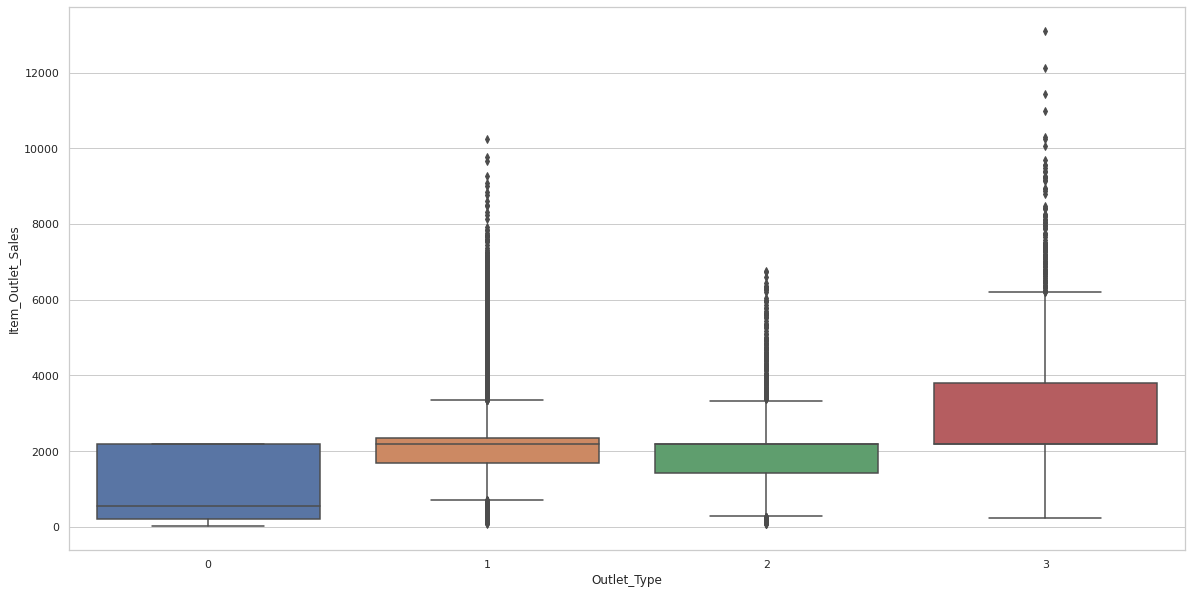

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = Store)

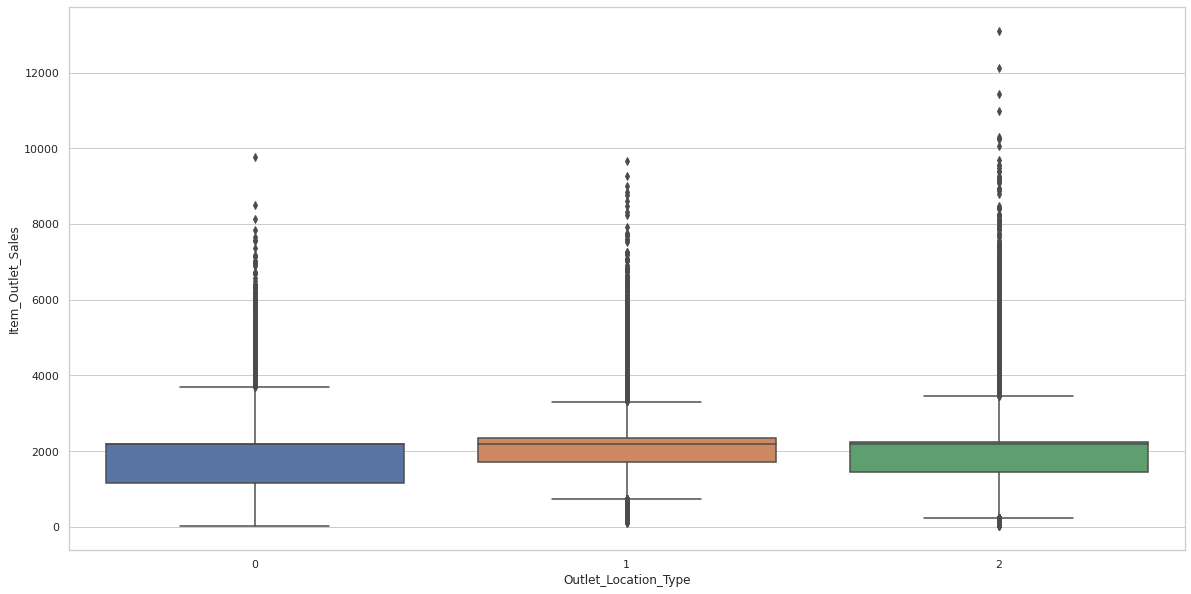

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = Store)

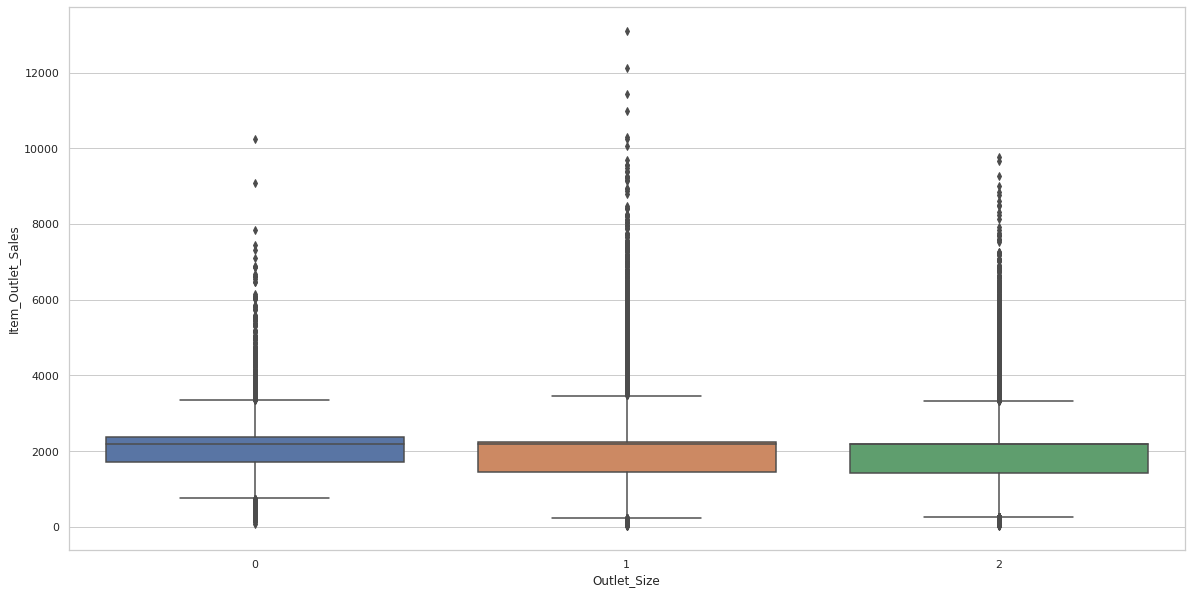

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = Store)

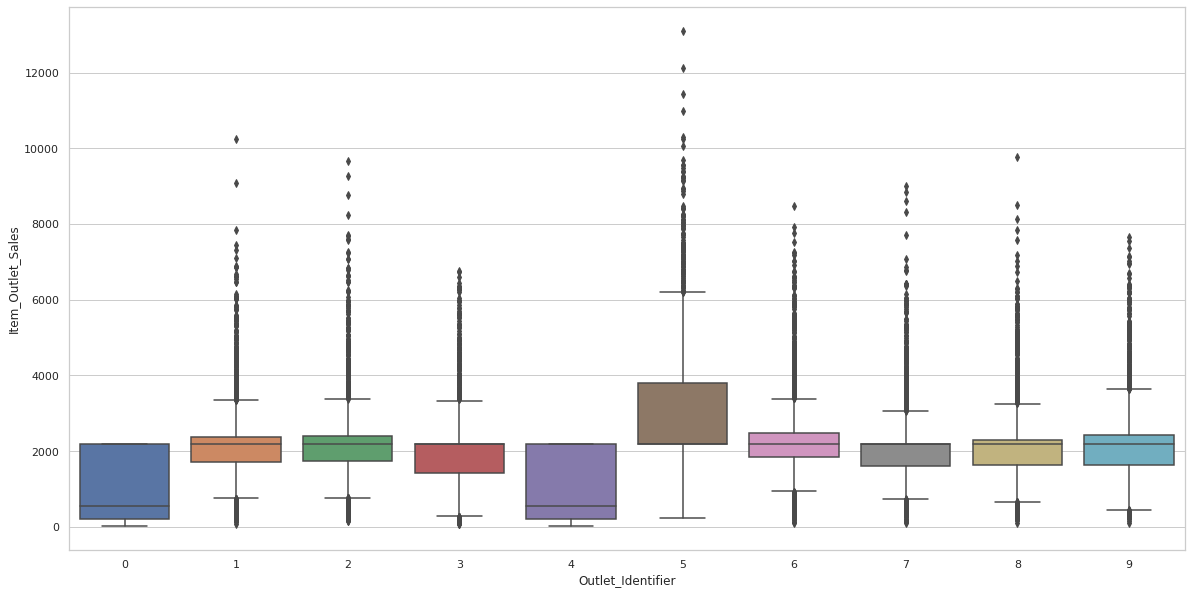

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = Store)

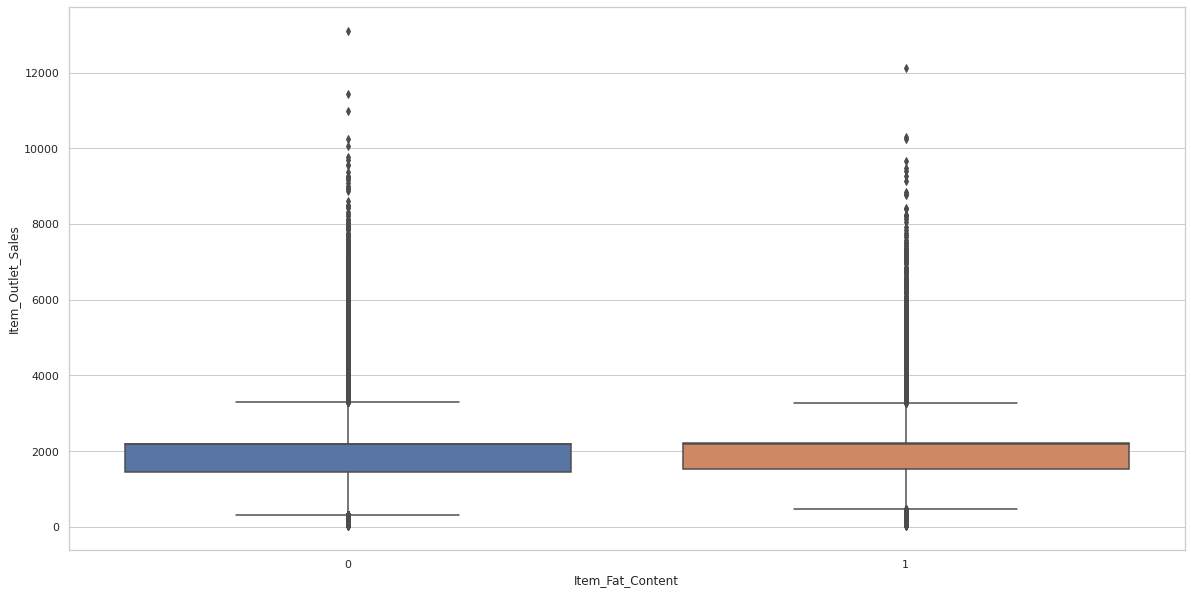

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = Store)

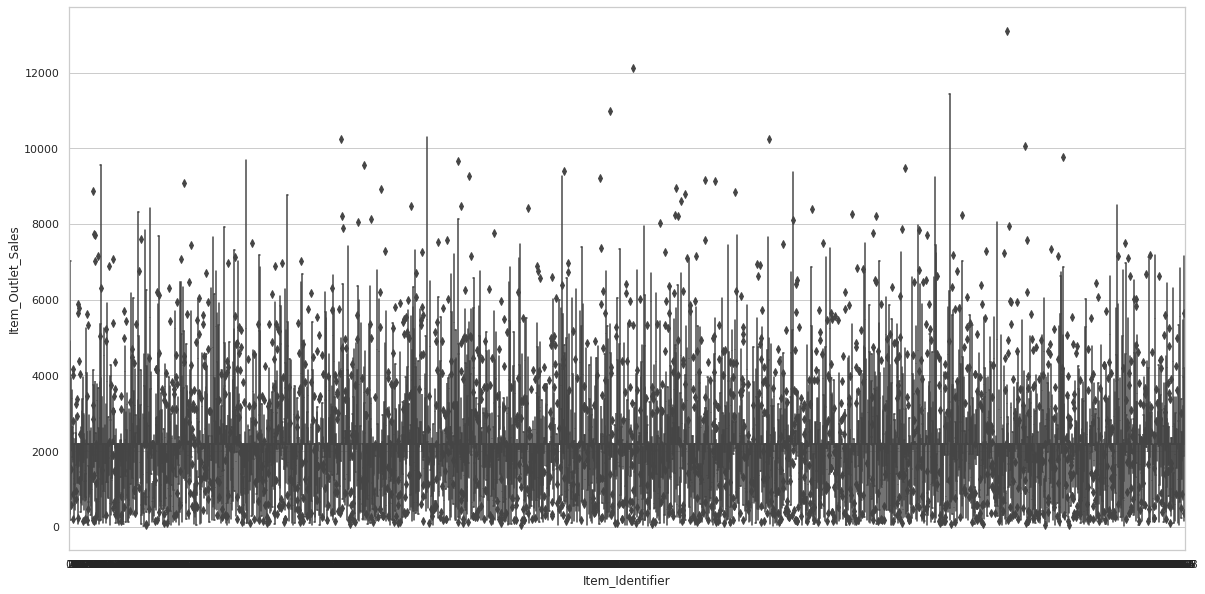

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Item_Identifier', y = 'Item_Outlet_Sales', data = Store)

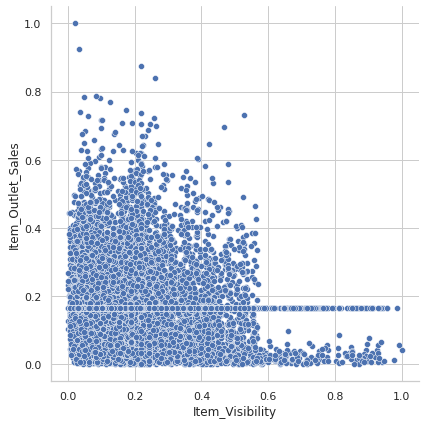

In [ ]:
sns.pairplot(corr_store_df,x_vars='Item_Visibility', y_vars='Item_Outlet_Sales',height=6)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

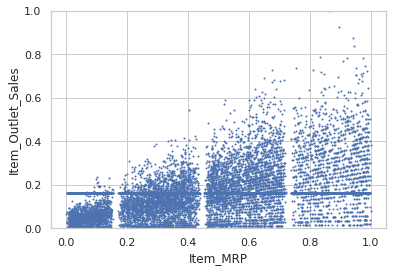

In [ ]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.set_xlabel('Item_MRP', fontsize=12)
ax.set_ylabel('Item_Outlet_Sales', fontsize=12)
plt.ylim((0,1))
#mt_df_test=X_test

corr_store_df.plot.scatter(x = 'Item_MRP', y = 'Item_Outlet_Sales', s = 1, ax=ax)

plt.show()


# Splitting Data

In [ ]:
X=np.array(corr_store_df.iloc[:,:-1])
y=np.array(corr_store_df.iloc[:,[-1]])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1500)

#### Training the Data

In [ ]:
s_model = LinearRegression().fit(X_train, y_train)
s_r_sq=s_model.score(X_train, y_train)

In [ ]:
print('coefficient of determination:', s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

coefficient of determination: 0.30336970334620095
intercept: [0.03113833]
slope: [[-0.03144628  0.1695023   0.03040578  0.11352575]]


#### Prediction of Model

In [ ]:
y_pred = s_model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.07602808]
 [0.12611392]
 [0.09906622]
 ...
 [0.11197617]
 [0.1692885 ]
 [0.18223086]]


#### Evaluation of Model Performances

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("The Value of MSE =",MSE)
print("The Value of MAE =",MAE)
print("The Value of RMSE =",RMSE)

The Value of MSE = 0.007008288493659915
The Value of MAE = 0.06300082443601408
The Value of RMSE = 0.08371552122312752


As we can see from the above diagram, we can both data (Test & Predicted) are highly co related with each other.


# Multiple Linear Regression.

### Training the model

In [ ]:
model_mul = LinearRegression().fit(X_train, y_train)

In [ ]:
print('The Value of Intercept is : \n', model_mul.intercept_)
print('The Value of Coefficients : \n', model_mul.coef_)
r_sq2 = model_mul.score(X_train,y_train)
print('The Value of coefficient of determination is :', r_sq2)

The Value of Intercept is : 
 [0.03113833]
The Value of Coefficients : 
 [[-0.03144628  0.1695023   0.03040578  0.11352575]]
The Value of coefficient of determination is : 0.30336970334620095


### Evaluating the model performance

In [ ]:
MSE=mean_squared_error(y_test, model_mul.predict(X_test))
RMSE = mean_squared_error(y_test, model_mul.predict(X_test), squared=False)
print('The Value of Mean Square Error is : \n',MSE)
print('The Value of Root Mean Square Error is : \n', RMSE)

The Value of Mean Square Error is : 
 0.007008288493659915
The Value of Root Mean Square Error is : 
 0.08371552122312752


# Decision Tree Regressor

In [ ]:
#DECISION TREE
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared of train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)
print("R-Squared of test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared of train dataset=0.3437568350359639
R-Squared of test dataset=0.3540045021843198


In [ ]:
# Create Decision Tree regressor object
reg = DecisionTreeRegressor(max_depth=2)

In [ ]:
# Train Decision Tree regressor
reg = reg.fit(X_train,y_train)


In [ ]:
#Predict the response for test dataset
y_pred_test_tree = reg.predict(X_test)
print("y_pred_test " , y_pred_test_tree)

y_pred_test  [0.10241956 0.10241956 0.14318548 ... 0.10241956 0.14318548 0.22122736]


In [ ]:
#Predict the response for traint dataset
y_pred_train_tree = reg.predict(X_train)
print("y_pred_train " , y_pred_train_tree)
y_pred= cross_val_predict(dtm, X_test, y_test )
print("The predicted outcomes of test data :\n")
print(y_pred)

y_pred_train  [0.22122736 0.22122736 0.22122736 ... 0.14318548 0.22122736 0.22122736]
The predicted outcomes of test data :

[0.10117529 0.14199088 0.08188619 ... 0.10238122 0.1425389  0.18859178]


In [ ]:
#checking the error values for test data
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print("The value of MSE is :", MSE)
print("The value of MAE is :", MAE)
print("The value of RMSE is :", RMSE)

The value of MSE is : 0.006640958218436822
The value of MAE is : 0.06237505403895099
The value of RMSE is : 0.08149207457438314


#  Random Forest Regressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# TRAIN DATA
#Predict the response for test dataset
train_pred = model.predict(X_train)
# Model Accuracy, how often is the regressor correct?
print("Predicted outcome for train data is : \n",train_pred)

Predicted outcome for train data is : 
 [0.11374175 0.18169185 0.23489511 ... 0.16303187 0.22071218 0.20104742]


In [ ]:
MSE= mean_squared_error(y_train, model.predict(X_train))
RMSE = mean_squared_error(y_train, model.predict(X_train), squared=False)
MAE = mean_absolute_error(y_train, model.predict(X_train))
print("R-Squared value of training data :", metrics.r2_score(y_train, train_pred))
print('MSE :' ,MSE)
print('RMSE :' ,RMSE)
print('MAE : ', MAE)

R-Squared value of training data : 0.8955645795803255
MSE : 0.0010831744841778787
RMSE : 0.03291161624985742
MAE :  0.024186749165493845


In [ ]:
# TEST DATA
#Predict the response for test dataset
test_pred = model.predict(X_test)
# Model Accuracy, how often is the regressor correct?
print("Predicted outcome for test data is : \n",test_pred)

Predicted outcome for test data is : 
 [0.07719906 0.13262521 0.10718747 ... 0.09753202 0.13991818 0.18080459]


In [ ]:
# TEST DATA
MSE= mean_squared_error(y_test, model.predict(X_test))
RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)
MAE = mean_absolute_error(y_test, model.predict(X_test))
print("R-Squared value of testing data :", metrics.r2_score(y_test, test_pred))
print('MSE :' ,MSE)
print('RMSE :' ,RMSE)
print('MAE : ', MAE)

R-Squared value of testing data : 0.2509836535781005
MSE : 0.007472241377361544
RMSE : 0.08644212733014814
MAE :  0.06509713644293531


## Adaboost Regressor

In [ ]:
model1 = AdaBoostRegressor()
model1.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
# TRAIN DATA
#Predict the response for test dataset
train_pred = model1.predict(X_train)
# Model Accuracy, how often is the regressor correct?
print("Predicted outcome for train data is : \n",train_pred)

Predicted outcome for train data is : 
 [0.18221604 0.24805489 0.30934408 ... 0.13026568 0.20873431 0.29120636]


In [ ]:
MSE= mean_squared_error(y_train, model1.predict(X_train))
RMSE = mean_squared_error(y_train, model1.predict(X_train), squared=False)
MAE = mean_absolute_error(y_train, model1.predict(X_train))
print("R-Squared value of train data :", metrics.r2_score(y_train, train_pred))
print('MSE :' ,MSE)
print('RMSE :' ,RMSE)
print('MAE : ', MAE)

R-Squared value of train data : 0.22886619317620005
MSE : 0.007997980570978173
RMSE : 0.08943142943606668
MAE :  0.07138249622002332


In [ ]:
# TEST DATA
#Predict the response for test dataset
test_pred = model1.predict(X_test)
# Model Accuracy, how often is the regressor correct?
print("Predicted outcome for test data is : \n",test_pred)

Predicted outcome for test data is : 
 [0.11022093 0.11022093 0.10377002 ... 0.11022093 0.16898251 0.20873431]


In [ ]:
# TEST DATA
MSE= mean_squared_error(y_test, model1.predict(X_test))
RMSE = mean_squared_error(y_test, model1.predict(X_test), squared=False)
MAE = mean_absolute_error(y_test, model1.predict(X_test))
print("R-Squared value of testing data :", metrics.r2_score(y_test, test_pred))
print('MSE :' ,MSE)
print('RMSE :' ,RMSE)
print('MAE : ', MAE)

R-Squared value of testing data : 0.19133437655266916
MSE : 0.008067306889680912
RMSE : 0.089818187967031
MAE :  0.07126754818112405


#### From the above models that we calculated, We can say that Decision Tree model gives us the best output as compared to others. 